In [1]:
import os
# Find the latest version of spark 3.0 from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.3'
spark_version = 'spark-3.0.3'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()


Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.com/compute/

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("M16-Amazon-Challenge").config("spark.driver.extraClassPath","/content/postgresql-42.2.16.jar").getOrCreate()


In [3]:
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving seaice.csv to seaice.csv


In [5]:
import io
sea_ice_df = pd.read_csv(io.BytesIO(uploaded['seaice.csv']))
sea_ice_df.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north


In [8]:
northern_df = sea_ice_df[sea_ice_df['hemisphere'] == 'north']
northern_df.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north


In [9]:
southern_df = sea_ice_df[sea_ice_df['hemisphere'] == 'south']
southern_df.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
13177,1978,10,26,17.624,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,south
13178,1978,10,28,17.803,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,south
13179,1978,10,30,17.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,south
13180,1978,11,1,17.527,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,south
13181,1978,11,3,17.486,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,south


Northern Hemisphere

In [10]:
northern_df.shape

(13177, 7)

In [11]:
northern_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13177 entries, 0 to 13176
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          13177 non-null  int64  
 1    Month        13177 non-null  int64  
 2    Day          13177 non-null  int64  
 3        Extent   13177 non-null  float64
 4       Missing   13177 non-null  float64
 5    Source Data  13177 non-null  object 
 6   hemisphere    13177 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
northern_df.describe()

,Year,Month,Day,Extent,Missing
count,13177.000000,13177.000000,13177.000000,13177.000000,13177.0
mean,2000.591941,6.507399,15.740685,11.362796,0.0
std,10.897027,3.452003,8.801774,3.259783,0.0
min,1978.000000,1.000000,1.000000,3.340000,0.0
25%,1992.000000,4.000000,8.000000,8.670000,0.0
50%,2001.000000,7.000000,16.000000,12.076000,0.0
75%,2010.000000,10.000000,23.000000,14.236000,0.0
max,2019.000000,12.000000,31.000000,16.635000,0.0


Mean value of Extent is lower than the median (50 percentile), suggests a skew

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

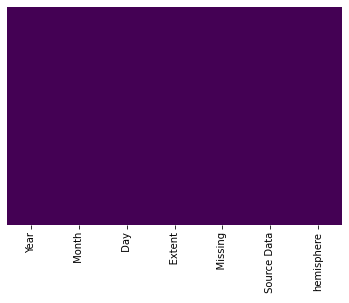

In [20]:
sns.heatmap(northern_df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

No missing values for northern hemisphere

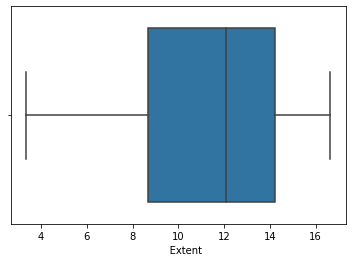

In [31]:
sns.boxplot(x=northern_df['     Extent'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


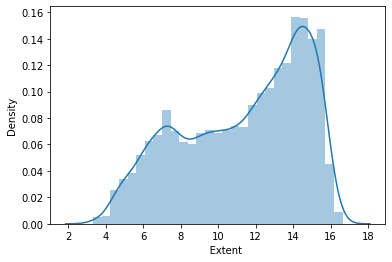

In [32]:
sns.distplot(northern_df['     Extent'], kde=True)

Southern Hemisphere

In [33]:
southern_df.shape

(13177, 7)

In [34]:
southern_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13177 entries, 13177 to 26353
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          13177 non-null  int64  
 1    Month        13177 non-null  int64  
 2    Day          13177 non-null  int64  
 3        Extent   13177 non-null  float64
 4       Missing   13177 non-null  float64
 5    Source Data  13177 non-null  object 
 6   hemisphere    13177 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 823.6+ KB


In [35]:
southern_df.describe()

,Year,Month,Day,Extent,Missing
count,13177.000000,13177.000000,13177.000000,13177.000000,13177.000000
mean,2000.591941,6.507399,15.740685,11.627176,0.000006
std,10.897027,3.452003,8.801774,5.645942,0.000321
min,1978.000000,1.000000,1.000000,2.080000,0.000000
25%,1992.000000,4.000000,8.000000,6.004000,0.000000
50%,2001.000000,7.000000,16.000000,12.537000,0.000000
75%,2010.000000,10.000000,23.000000,17.205000,0.000000
max,2019.000000,12.000000,31.000000,20.201000,0.024000


Approximately the same difference between mean and mode as northern
Difference between maximum and 75th percentile is larger than northern

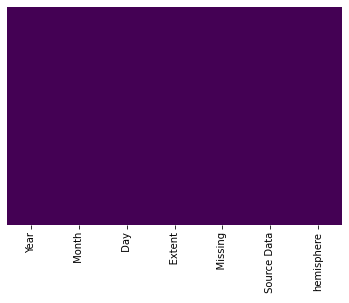

In [36]:
sns.heatmap(southern_df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

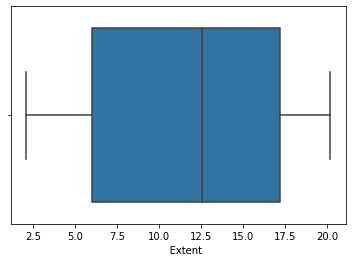

In [37]:
sns.boxplot(x=southern_df['     Extent'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


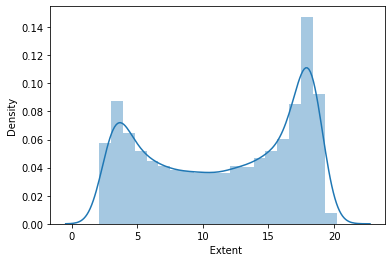

In [38]:
sns.distplot(southern_df['     Extent'], kde=True)

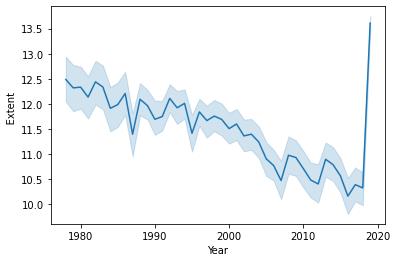

In [39]:
sns.lineplot(x=northern_df['Year'], y=northern_df['     Extent'])

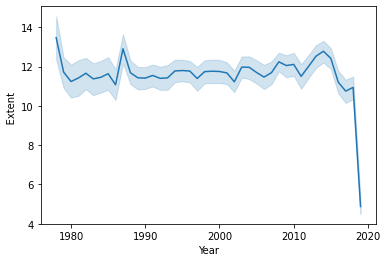

In [42]:
sns.lineplot(x=southern_df['Year'], y=southern_df['     Extent'])